# Проектная работа

## Загрузите данные и подготовьте их к анализу

## Часть 1. Приоритизация гипотез

1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета
2. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло

## Часть 2. Анализ А/В-ткста

1. Кумулятивная выручка в разбивке по группам.
2. Кумулятивный средний чек в разбивке по группам.
3. Относительное изменение кумулятивного среднего чека группы B к группе A.
4. Постройте график кумулятивной конверсии по группам.
5. Относительное изменение кумулятивной конверсии группы B к группе А.
6. Постройте точечный график количества заказов по пользователям.
7. Посчитаем 95-й и 99-й перцентили.
8. Построим графики стоимостей заказов.
9. Посчитаем 95-й и 99-й перцентили стоимости заказов.
10.Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.
11.Посчитайте статистическую значимость различия средних чеков между группами по «сырым» данным.
12.Статистическая значимость различий в конверсии между группами по «очищенным» данным.
13.Статистическая значимость различий в среднем чеке заказа между группами по « «очищенным» данным.
14.Примите решение по результатам теста и объясните его.

## Вывод

# 1  Загрузите данные и подготовьте их к анализу

In [2]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

Получим общую информацию о данных:

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Приведём название столбцов к нижнему регистру

In [6]:
# Приведение к нижнему регистру
hypothesis.columns = map(str.lower, hypothesis.columns)

Приведем типы даты в необходимый формат для работы над ними.

In [7]:
# Изменение формата данных
orders['date'] = pd.to_datetime(orders['date'], format ='%Y-%m-%d' )
visitors['date'] = pd.to_datetime(visitors['date'], format ='%Y-%m-%d' )

In [8]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
# проверим как разделены наши пользователи на группы
orders.drop(['date'], axis=1).groupby('group', as_index=False).agg({'visitorId': 'sum', 'revenue': 'sum'})

,group,visitorId,revenue
0,A,1211535685633,4084803
1,B,1381118605657,5907760


In [10]:
orders.drop(['date'], axis=1).groupby('visitorId', as_index=False).agg({'group': 'sum', 'revenue': 'sum'})

,visitorId,group,revenue
0,5114589,B,570
1,6958315,B,1490
2,8300375,BA,12300
3,11685486,A,6201
4,39475350,B,3990
...,...,...,...
1026,4266935830,AB,157980
1027,4278982564,A,24744
1028,4279090005,B,6716
1029,4281247801,B,2640


In [11]:
np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

<p style="font-family: Arial; font-size:1.4em;color:blue;">  Комментарий студента: Исправила </p>

In [12]:
# проверим на дубликаты
hypothesis.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
visitors.duplicated().sum()

0

In [15]:
hypothesis.isnull()

,hypothesis,reach,impact,confidence,efforts
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False


In [16]:
orders.isnull()

,transactionId,visitorId,date,revenue,group
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1192,False,False,False,False,False
1193,False,False,False,False,False
1194,False,False,False,False,False
1195,False,False,False,False,False


In [17]:
visitors.isnull()

,date,group,visitors
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
57,False,False,False
58,False,False,False
59,False,False,False
60,False,False,False


Вывод
Таблицу hypothesis привели к нижнему регистру, в таблицах orders и visitors d сталбецах  data поменили тип на datetime.
Пропусков и дубликатов не обнаруженно.

# 2  Часть 1. Приоритизация гипотез

In [18]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [19]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез и отсортируем по убыванию

In [20]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Применим фреймворк RICE для приоритизации гипотез и отсортируем по убыванию

In [21]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло

По метрике RICE на первом месте гипотезы 
* 8 (Запустить акцию, дающую скидку на товар в день рождения),
* 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок),
* 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа), 
* 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей),
* 6 (Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию),

Т .к. в отличии от ICE эта метрика учитывает охват (как много пользователей затронет гипотеза). 
Лидирующая метрика 

* 8 (Запустить акцию, дающую скидку на товар в день рождения) в метрике ICE упала на 5 позицию поскольку имеет не такой большой охват по сравнению с гипотезами 
* 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), 
* 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа), 
* 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей), 
* 6 (Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию).

В первую очередь нужно проверить гипотезу 
* 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок),
* 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей)

# Шаг 3. Анализ A/B-теста

1.Кумулятивная выручка в разбивке по группам

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# выведем 5 значений
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Объявем переменные cumulativeRevenueA и cummulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B. Построим график.

In [23]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Построим графики накопления выручки в каждой группе

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


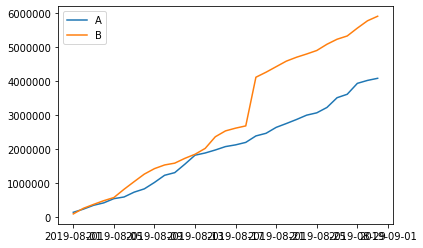

In [24]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

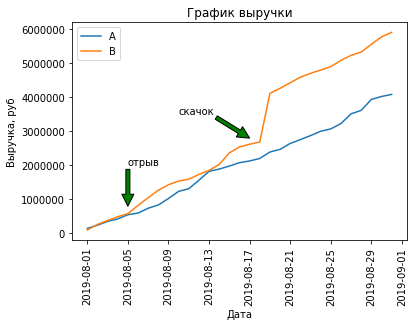

In [25]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=90)
plt.title('График выручки')
plt.xlabel('Дата')
plt.ylabel('Выручка, руб')
plt.legend()

plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 
plt.show()

График кумулятивной выручки группы B в течении всего теста лежит выше, чем график кумулятивной выручки группы A. Пользователи, посещающие сайт в версии "B", приносят нам больше денег.

2. Кумулятивный средний чек в разбивке по группам

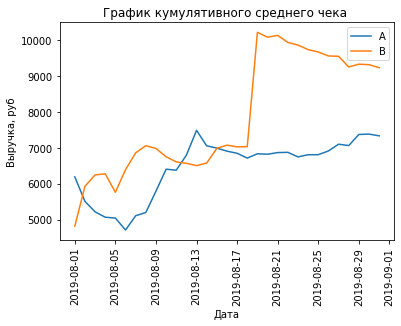

In [26]:
# Для каждой группы постройте графики кумулятивного среднего чека по дням.
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=90)
plt.title('График кумулятивного среднего чека ')
plt.xlabel('Дата')
plt.ylabel('Выручка, руб')
plt.legend()
plt.show()

По среднему чеку видно, что группа В сначала приносила больший среднний чек, а затем немножко просела. После наблюдается резкий скачок. Скорее всего это аномальные значения в группе В.

3. Относительное изменение кумулятивного среднего чека группы B к группе A.

In [27]:
# Объединим таблицы cumulativeRevenueA и cumulativeRevenueB 
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head(5)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


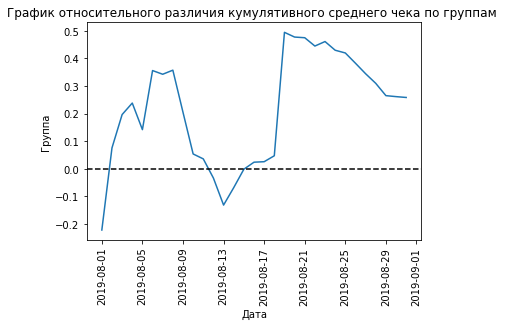

In [28]:
# Постройте график относительно различия кумулятивного среднего чека группы B к группе A.
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=90)
plt.title('График относительного различия кумулятивного среднего чека по группам ')
plt.xlabel('Дата')
plt.ylabel('Группа')
# Добавим ось Х
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы


4.Постройте график кумулятивной конверсии по группам

In [29]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


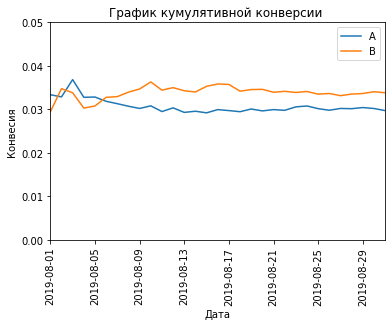

In [30]:
#  считаем кумулятивную конверсию 
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Построим график
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=90)
plt.title('График кумулятивной конверсии ')
plt.xlabel('Дата')
plt.ylabel('Конвесия')
plt.legend()
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])
plt.show()

В начале группа А имела большую коныкрсию чем В, но дальше у группы В конверсия становится луше и да конца теста у группы В конверсия вышк группы А

5.Относительное изменение кумулятивной конверсии группы B к группе А

In [31]:
# Объедините таблицы cumulativeDataA и cumulativeDataB 
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
      left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

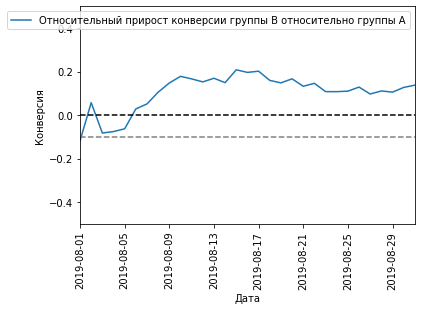

In [32]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', right_on='date', how='left', 
                                                                           suffixes=['A', 'B'])
# Построим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()

По графику накопительная конверсия по группе B практически на всем протяжении лежит значительно выше накопительной конверсии группы A.

6.Постройте точечный график количества заказов по пользователям

Найдем количество заказов пользователей в каждый день теста. Постороим точечный график распределения заказов

In [33]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [34]:
ordersByUsers = (
    orders.drop(['group','revenue','date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']    


In [35]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))  

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


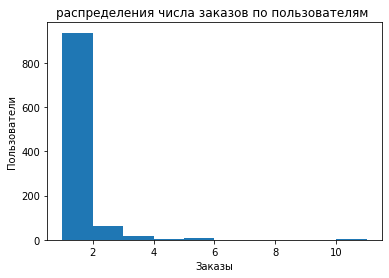

In [36]:
# Постройте гистограмму распределения числа заказов по пользователям
plt.hist(ordersByUsers['orders'])
plt.title('распределения числа заказов по пользователям ')
plt.xlabel('Заказы')
plt.ylabel('Пользователи')

plt.show()

Большинство пользователей совершило всего 1 заказ. Однако не ясно, сколько пользователей заказало 2, 3 и более раза. построим график другого вида

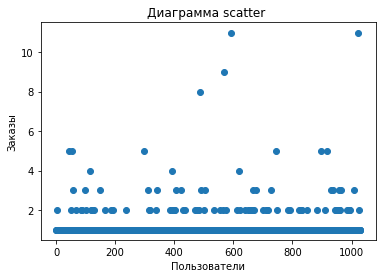

In [37]:
# Построим диаграмму методом scatter()
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Диаграмма scatter ')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')

plt.show()

По диаграмме видно, что пользователь заказавших более 2 раз мало, они могут быть анамальными.
Нужно посчитать перцентили.

7.Посчитаем 95-й и 99-й перцентили

In [38]:
# Метод np.percentile() находит перцентили.
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))


[1. 2. 4.]


Из полученных данных можно сделать вывод, что только 5% пользователей от общего числа совершали 2 заказ. 1% процент пользователей совершал 4 заказа

8.Построим графики стоимостей заказов

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


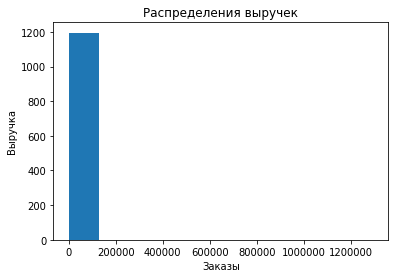

In [39]:
# Постройте гистограмму распределения выручек
print(orders.sort_values(by='revenue', ascending=False).head(10))
plt.hist(orders['revenue'])
plt.title('Распределения выручек')
plt.xlabel('Заказы')
plt.ylabel('Выручка')

plt.show()


Видем по гистаграмме что все заказы меньше 200 тыс однако мы не можем сказать о более дешевых заказах, построим диаграмму scatter()

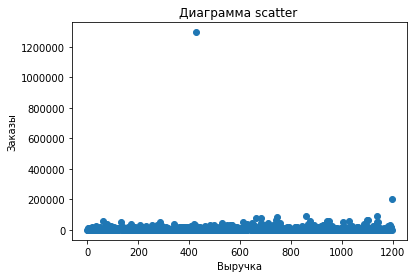

In [40]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Диаграмма scatter ')
plt.xlabel('Выручка')
plt.ylabel('Заказы')

plt.show()

По диаграмме видно что заказов выше 200 тыс нет, есть выбросы в райне 1200 тыс и 200 тыс, но заказ на 1200 тыс выглядит анамально.

9.Посчитаем 95-й и 99-й перцентили стоимости заказов

In [41]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


у 5% покупатель чек 28 тыс, а у 1% - 58 тыс

10.Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. Затем получим семпл каждой группы, вычев из количества поситетелей количество заказов. Проведем тест Уилкоксона-Манна-Уитни для нахождения статистической значимости конверсии между группами.

<p style="font-family: Arial; font-size:1.4em;color:blue;">  
1. Нуливая гипотеза: конверсии в группах А и В равны. 
2. Альтернативная гипотеза:конверсии в группах А и В отличаются. </p>

In [42]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [43]:
# Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


<p style="font-family: Arial; font-size:1.4em;color:blue;">  Комментарий студента: Исправила </p>

In [44]:
# Посчитаем статистическую значимость различия в конверсии между группами
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 


In [45]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value нулевой гипотезы о равенстве конверсий в группах А и В: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост группы B составляет:{0:.3%}".format(sampleB.mean() / sampleA.mean() - 1))
 

p-value нулевой гипотезы о равенстве конверсий в группах А и В: 0.008
Относительный прирост группы B составляет:13.808%


In [46]:
print("p-value нулевой гипотезы о равенстве среднего чека в группах А и В: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный прирост среднего чека в группе B: {0:.2%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p-value нулевой гипотезы о равенстве среднего чека в группах А и В: 0.365
Относительный прирост среднего чека в группе B: 25.87%


Нулевая гипотеза о равенстве конверсий в группах отклонена при p-value равном 0.008, относительный прирост составляет 13.81%, это неплохой показатель, но нужно понять не случилось ли такое изменение благодаря всего нескольким случайным аномальным событиям

Нулевая гипотеза о равенств среднего чека не может быть отклонена, при p-value равном 0.365 это слишком большая вероятность получить такую разницу случайно. Средний чек отличается, относительный прирост в 25.87% это подтверждает.

In [47]:
# Количество пользователей c аномальными значениями  в заказах в пределах 99-го процентиля
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64
(15,)


Количество пользователей c аномальными значениями  в заказах в пределах 99-го процентиля: 15

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста

In [48]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


In [53]:
# Применим статистический критерий Манна-Уитни к полученным выборкам:
print("p-value нулевой гипотезы о равенстве конверсий в группах А и В для 99 процентилей: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный прирост группы B для 99 процентилей составляет:{0:.2%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


p-value нулевой гипотезы о равенстве конверсий в группах А и В для 99 процентилей: 0.011
Относительный прирост группы B для 99 процентилей составляет:20.43%


<p style="font-family: Arial; font-size:1.4em;color:blue;">  Добавила alternative = 'two-sided', да действительно поменялись цифры) </p>

In [54]:
# результататы по среднему чеку
print(
    "p-value нулевой гипотезы о равенстве среднего чека в группах А и В для 99 процентилей:{0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека в группе B для 99 процентилей: {0:.2%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value нулевой гипотезы о равенстве среднего чека в группах А и В для 99 процентилей:0.394
Относительный прирост среднего чека в группе B для 99 процентилей: -1.66%


In [55]:
# Количество пользователей c аномальными значениями в заказах в пределах 95-го процентиля
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 


1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64
(68,)


In [56]:
# тоже самое сделаем и с 95 - процентилем
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0)

print("p-value нулевой гипотезы о равенстве конверсий в группах А и В для 95 процентилей: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered,
                                                                                                          sampleBFiltered)[1]))

print("Относительный прирост группы B для 95 процентилей составляет: {0:.2%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

print("p-value нулевой гипотезы о равенстве среднего чека в группах А и В для 95 процентилей: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительный прирост среднего чека в группе B для 95 процентилей: {0:.2%}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value нулевой гипотезы о равенстве конверсий в группах А и В для 95 процентилей: 0.006
Относительный прирост группы B для 95 процентилей составляет: 20.43%
p-value нулевой гипотезы о равенстве среднего чека в группах А и В для 95 процентилей: 0.394
Относительный прирост среднего чека в группе B для 95 процентилей: -1.66%


Результаты:

Количество пользователей c аномальными значениями в заказах в пределах 95-го процентиля: 68
1. p-value нулевой гипотезы о равенстве конверсий в группах А и В для 95 процентилей: 0.006
2. Относительный прирост группы B для 95 процентилей составляет: 20.43%
3. p-value нулевой гипотезы о равенстве среднего чека в группах А и В для 95 процентилей: 0.394
4. Относительный прирост среднего чека в группе B для 95 процентилей: -1.66%

Количество пользователей c аномальными значениями в заказах в пределах 99-го процентиля: 15
1. p-value нулевой гипотезы о равенстве конверсий в группах А и В для 99 процентиля: 0.007 (0,011)
2. Относительный прирост группы B для 99 процентиля составляет: 15.33% (20,43%)
3. p-value нулевой гипотезы о равенстве среднего чека в группах А и В для 99 процентиля: 0.425 (0,394)
4. Относительный прирост среднего чека в группе B для 99 процентиля: -0.57% (-1,66%)

Данные без фильтра:
1. p-value нулевой гипотезы о равенстве конверсий в группах А и В: 0.008
2. Относительный прирост группы B составляет: 13.81%
3. p-value нулевой гипотезы о равенстве среднего чека в группах А и В: 0.365
4. Относительный прирост среднего чека в группе B: 25.87%

# Вывод
При проверке данных мы нашли ошибки, когда в двух группах содержаться оди и теже пользователи. Ошибок не очень много мы продолжаем эксперемент.

При анализе гипотез мы нашла гипотезы которые проанализируем 
* 8 (Запустить акцию, дающую скидку на товар в день рождения),
* 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок),
* 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа),
* 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей),
* 6 (Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию),
В первую очередь нужно проверить гипотезу
* 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок),
* 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей)

По куммулитивным метрикам видно:
По среднему чеку видем, что группа В сначала приносила больший среднний чек, а затем немножко просела. После наблюдается резкий скачок. Скорее всего это аномальные значения в группе В.
В графике относительного  различия кумулятивного среднего чека группы B к группе A. - Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.
В кумулятивной конверсии, в начале группа А имела большую коныкрсию чем В, но дальше у группы В конверсия становится луше и да конца теста у группы В конверсия выше группы А.
По расчетам заказов в день, видим что заказы совершались не более одного раза.
Посчитали 95-й и 99-й перцентили и выявили, что Из полученных данных можно сделать вывод, что только 5% пользователей от общего числа совершали 2 заказ. 1% процент пользователей совершал 4 заказа.
Посчитали стоимость заказов по  95-й и 99-й перцентили, стоимость заказа были на 95 перцентиле -28000 ед, перцентили 99 - 58233.2 ед.

Провели гипотезы:
Во всех случаях гипотеза о равенстве конверсий может быть отколнена, p-value слишком мал
Относительный прирост конверсии с 13.81% поднимается до 20.43% при фильтрации данных
Гипотезу о равенстве среднего чека во всех случаях нельзя отклонить, такие различия можно получить и случайно.
Относительный прирост при фильтрации данных сходит на нет и даже становится отрицательным для группы В

Эти результаты говорят о том, что конверсия для группы В действительно выше группы А, а средний чек с большой вероятностью одинаковый, различия возникли из за аномальных заказов.
Тест можно признать успешным.